In [1]:
import sys
import warnings
import random

import numpy as np
import scipy as sp
import matplotlib as mpl
import matplotlib.cm as cm
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn import mixture

import astrobf

from astrobf import tGMM

from astrobf.tGMM import *

Step #1: Generating a Gaussian-Mixture-Model dataset
True parameters:
pp: 
[ 0.2  0.3  0.5]

mu: 
[[ 10.  -1.]
 [ 20.  20.]
 [ -3.   3.]]

sigma: 
[[[  5.   0.]
  [  0.  20.]]

 [[ 20.   0.]
  [  0.  20.]]

 [[ 20.   0.]
  [  0.   5.]]]



KeyboardInterrupt: 

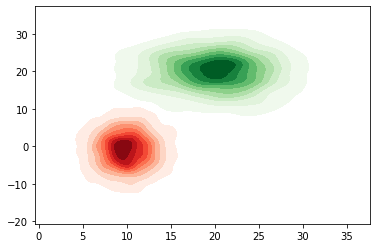

In [6]:
import sys
import warnings

from astrobf.tGMM.experiments import perform_bivariate_3_gaussians_exp

if not sys.warnoptions:
    warnings.simplefilter("ignore")
    

def main(argv):
    # Number of data points
    N = 10000

    # Define the true values of mixture weights
    pp = np.array([0.5, 0.2, 0.3])

    # Define Gaussian components
    mu_1 = np.array([-3., 3.])
    mu_2 = np.array([10., -1.])
    mu_3 = np.array([20., 20.])
    sigma_1 = np.diag([20., 5.])
    sigma_2 = np.diag([5., 20.])
    sigma_3 = np.diag([20., 20.])

    # Define the truncation and censoring bounds
    truncation_bounds = np.array([0.1, np.inf])
    censoring_bounds = np.array([[0], [np.inf]])

    # Start the experiment 
    pattern = tGMM.experiments.perform_bivariate_3_gaussians_exp(N, pp, mu_1, mu_2, mu_3,
                                      sigma_1, sigma_2, sigma_3,
                                      truncation_bounds, censoring_bounds)
    
    return pattern

if __name__ == "__main__":
    pattern = main(sys.argv)


In [10]:
def find_censoring_pattern(x, bounds):
    """Find the censoring pattern from the truncated and censored data.
    
    Args:
        x (2D numpy array): The data points.
        bounds (2D numpy array): The lower and upper censoring bounds.
        
    Returns:
        pattern (dictionary): The desired pattern.
    """
    # Get the number of data points and the number of dimensions
    # of each data point
    N, D = x.shape

    # Get the lower and upper censoring bounds
    if bounds.shape[0] == 1:
        bounds = bounds.T
    if bounds.shape[1] < D:
        bounds = bounds * np.ones([1, D])
    lower_bounds = bounds[0, :]
    upper_bounds = bounds[1, :]

    # Find the censored coordiantes
    censored = (x > lower_bounds) & (x < upper_bounds)

    # Find the datapoints that are completely observed
    complete_instances = censored[:, 0] & censored[:, 1]

    # Estimate the integral region for each datapoint
    integral_regions = []
    for n in range(N):
        # Get the uncensored locations
        uncens_loc = ~censored[n, :]
        
        # Check if the datpoint is fully observed
        if uncens_loc.sum() > 0:
            reg_lower_bound = upper_bounds[uncens_loc]
            reg_upper_bound = lower_bounds[uncens_loc]
            
            reg_lower_bound[x[n, uncens_loc] == lower_bounds[uncens_loc]] =\
                np.array(-np.inf)
            reg_upper_bound[x[n, uncens_loc] == upper_bounds[uncens_loc]] =\
                np.array(np.inf)
            
            integral_regions.append([reg_lower_bound, reg_upper_bound])
        else:
            integral_regions.append([[], []])
            
    # Re-order the censoring pattern
    unique_pattern = np.unique(censored, axis=0)
    print("unique_pattern1", unique_pattern)
    same_pattern = np.zeros([N, unique_pattern.shape[0]], dtype=np.bool)

    for k in range(unique_pattern.shape[0]):
        same_pattern[:, k] = (censored == unique_pattern[k, :]).all(axis=1)
    
    num_patterns = sum(same_pattern)

    idx = num_patterns.argsort()[::-1]
    num_patterns = num_patterns[idx]

    unique_pattern = unique_pattern[idx, :]
    print("unique_pattern2", unique_pattern)
    same_pattern = same_pattern[:, idx]

    # Return the dictionary containing the censoring patterns
    pattern = {
        'censored': censored,
        'complete': complete_instances,
        'range' : integral_regions,
        'uniq_censored': unique_pattern,
        'count': num_patterns,
        'xpttn': same_pattern
    }

    return pattern

def perform_truncated_em(x, K, truncated_bounds, censoring_bounds, 
                         pp, mu, sigma, max_iteration=200):
    """Estimate GMM's parameters by using EM algorithm for truncated and
       censored data.
    
    Args:
        x (2D numpy array): The observed data.
        K (int): The number of mixture component.
        truncated_bounds (2D numpy array): The truncated bounds.
        censoring_bounds (2D numpy array): The censoring bounds. 
        pp (1D numpy array): The initialized component probabilities.
        mu (2D numpy array): The initialized means.
        sigma (3D numpy array): The initialized covariance.
        max_iteration (int): The maximum number of iterations.
        
    Returns:
        results (dictionary): The dictionary containing estimated parameters
            and the logs of the experiment.
    """
    # Get the shapes of the data
    N, D = x.shape
    K = mu.shape[0]

    # Find censoring patterns of the data
    pattern = find_censoring_pattern(x, censoring_bounds)

    # Initialize the array used to track the log likelihood
    ll_old = -np.inf
    ll_hist = np.zeros([max_iteration])


Step #1: Generating a Gaussian-Mixture-Model dataset
True parameters:
pp: 
[ 0.2  0.3  0.5]

mu: 
[[ 10.  -1.]
 [ 20.  20.]
 [ -3.   3.]]

sigma: 
[[[  5.   0.]
  [  0.  20.]]

 [[ 20.   0.]
  [  0.  20.]]

 [[ 20.   0.]
  [  0.   5.]]]


********************************************************************************
Step #2: Censoring and truncating the data

********************************************************************************
Step #3: Initializing parameters using K-means

********************************************************************************
Step #4: Estimating parameters using truncated and censored EM


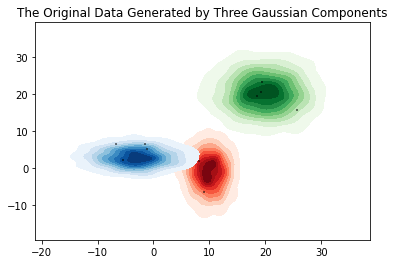

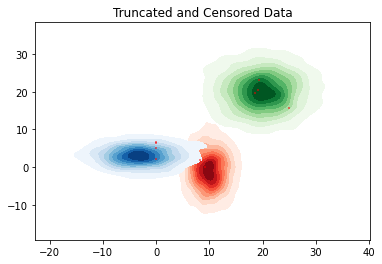

In [45]:
N = 10

# Define the true values of mixture weights
pp = np.array([0.5, 0.2, 0.3])

# Define Gaussian components
mu_1 = np.array([-3., 3.])
mu_2 = np.array([10., -1.])
mu_3 = np.array([20., 20.])
sigma_1 = np.diag([20., 5.])
sigma_2 = np.diag([5., 20.])
sigma_3 = np.diag([20., 20.])

# Define the truncation and censoring bounds
truncation_bounds = np.array([0.1, np.inf])
censoring_bounds = np.array([[0], [25]])


# Fix the random state
random.seed(seed)
np.random.seed(seed)

# Stack and reorder the means and covariance matrices into unified matrices
mu = np.stack([mu_1, mu_2, mu_3], axis=0)
sigma = np.stack([sigma_1, sigma_2, sigma_3], axis=2)
pp, mu, sigma = gmm_dataset.reorder_gmm_compoments(pp, mu, sigma)
K = mu.shape[0]

# Generate GMM data
print("Step #1: Generating a Gaussian-Mixture-Model dataset")
print("True parameters:")
print("pp: \n{}\n".format(pp))
print("mu: \n{}\n".format(mu))
print("sigma: \n{}\n".format(sigma.T))
y = gmm_dataset.generate_gmm_data(pp, mu, sigma, N)

# Plot the GMM data
plt.figure()
ax = vis.plot_gmm_data(y, mu, sigma, point_color='black')
plt.title("The Original Data Generated by Three Gaussian Components")
print("\n" + "*"*80)

# Perform censoring and truncation on the original data
print("Step #2: Censoring and truncating the data")
x = cutils.censor_and_truncate_data(y)

# Plot the censored and truncated data
plt.figure()
ax = vis.plot_gmm_data(y, mu, sigma, point_color='red')
plt.title("Truncated and Censored Data")
print("\n" + "*"*80)

# Init parameters using K-means
print("Step #3: Initializing parameters using K-means")
par = param_init.init_kmeans(x, K)
print("\n" + "*"*80)

# Estimating parameters using truncated and censored EM
print("Step #4: Estimating parameters using truncated and censored EM")
"""
tc_em_results = perform_truncated_em(x, K, 
                                     truncation_bounds, censoring_bounds, 
                                     par['pp'], par['mu'], par['sigma'], 
                                     max_iteration)
"""

#N, D = x.shape


# Find censoring patterns of the data
pattern = find_censoring_pattern(x, censoring_bounds)

# Initialize the array used to track the log likelihood
ll_old = -np.inf
ll_hist = np.zeros([max_iteration])

In [78]:
x2 = x.copy()
x2[0] = [0,25]

In [83]:
bounds = censoring_bounds
N, D = x.shape

# Get the lower and upper censoring bounds
if bounds.shape[0] == 1:
    bounds = bounds.T
if bounds.shape[1] < D:
    bounds = bounds * np.ones([1, D])
lower_bounds = bounds[0, :]
upper_bounds = bounds[1, :]

# Find the censored coordiantes
censored = (x > lower_bounds) & (x < upper_bounds)

# Find the datapoints that are completely observed
complete_instances = censored[:, 0] & censored[:, 1]


# Estimate the integral region for each datapoint
integral_regions = []
for n in range(N):
    # Get the uncensored locations
    uncens_loc = ~censored[n, :]

    # Check if the datpoint is fully observed
    if uncens_loc.sum() > 0:
        reg_lower_bound = upper_bounds[uncens_loc]
        reg_upper_bound = lower_bounds[uncens_loc]

        reg_lower_bound[x[n, uncens_loc] == lower_bounds[uncens_loc]] =\
            np.array(-np.inf)
        reg_upper_bound[x[n, uncens_loc] == upper_bounds[uncens_loc]] =\
            np.array(np.inf)

        integral_regions.append([reg_lower_bound, reg_upper_bound])
    else:
        integral_regions.append([[], []])

# Re-order the censoring pattern
unique_pattern = np.unique(censored, axis=0)
print("unique_pattern1", unique_pattern)
same_pattern = np.zeros([N, unique_pattern.shape[0]], dtype=np.bool)

for k in range(unique_pattern.shape[0]):
    same_pattern[:, k] = (censored == unique_pattern[k, :]).all(axis=1)

num_patterns = sum(same_pattern)

idx = num_patterns.argsort()[::-1]
num_patterns = num_patterns[idx]

unique_pattern = unique_pattern[idx, :]
print("unique_pattern2", unique_pattern)
same_pattern = same_pattern[:, idx]

# Return the dictionary containing the censoring patterns
pattern = {
    'censored': censored,
    'complete': complete_instances,
    'range' : integral_regions,
    'uniq_censored': unique_pattern,
    'count': num_patterns,
    'xpttn': same_pattern
}

unique_pattern1 [[False  True]
 [ True False]
 [ True  True]]
unique_pattern2 [[ True  True]
 [ True False]
 [False  True]]


In [90]:
same_pattern

array([[ True, False, False],
       [ True, False, False],
       [ True, False, False],
       [False,  True, False],
       [False, False,  True],
       [ True, False, False]], dtype=bool)

In [89]:
sum(same_pattern)

array([4, 1, 1])

In [79]:
pattern2 = find_censoring_pattern(x2, censoring_bounds)

# Initialize the array used to track the log likelihood
ll_old = -np.inf
ll_hist = np.zeros([max_iteration])

In [ ]:
from scipy.

In [80]:
pattern2

{'censored': array([[False, False],
        [ True,  True],
        [ True,  True],
        [ True, False],
        [False,  True],
        [ True,  True]], dtype=bool),
 'complete': array([False,  True,  True, False, False,  True], dtype=bool),
 'range': [[array([-inf,  25.]), array([  0.,  inf])],
  [[], []],
  [[], []],
  [array([-inf]), array([ 0.])],
  [array([ 25.]), array([ inf])],
  [[], []]],
 'uniq_censored': array([[ True,  True],
        [ True, False],
        [False,  True],
        [False, False]], dtype=bool),
 'count': array([3, 1, 1, 1]),
 'xpttn': array([[False, False, False,  True],
        [ True, False, False, False],
        [ True, False, False, False],
        [False,  True, False, False],
        [False, False,  True, False],
        [ True, False, False, False]], dtype=bool)}

In [48]:
pattern.keys()

dict_keys(['censored', 'complete', 'range', 'uniq_censored', 'count', 'xpttn'])

In [57]:
x

array([[  8.1974707 ,   1.98417273],
       [ 19.18438374,  20.46149265],
       [ 19.38095805,  23.15595224],
       [  9.09224548,   0.        ],
       [ 25.        ,  15.58713179],
       [ 18.50257033,  19.55510432]])

In [71]:
pattern['range'][3]

[array([-inf]), array([ 0.])]

In [50]:
pattern['censored']

array([[ True,  True],
       [ True,  True],
       [ True,  True],
       [ True, False],
       [False,  True],
       [ True,  True]], dtype=bool)

In [51]:
np.sum(pattern['censored'], axis=1)

array([2, 2, 2, 1, 1, 2])

In [52]:
pattern['complete']

array([ True,  True,  True, False, False,  True], dtype=bool)

In [53]:
pattern["uniq_censored"]

array([[ True,  True],
       [ True, False],
       [False,  True]], dtype=bool)

In [54]:
pattern["xpttn"]

array([[ True, False, False],
       [ True, False, False],
       [ True, False, False],
       [False,  True, False],
       [False, False,  True],
       [ True, False, False]], dtype=bool)

In [55]:
pattern['count']

array([4, 1, 1])

Step #1: Generating a Gaussian-Mixture-Model dataset
True parameters:
pp: 
[ 0.2  0.3  0.5]

mu: 
[[ 10.  -1.]
 [ 20.  20.]
 [ -3.   3.]]

sigma: 
[[[  5.   0.]
  [  0.  20.]]

 [[ 20.   0.]
  [  0.  20.]]

 [[ 20.   0.]
  [  0.   5.]]]


********************************************************************************
Step #2: Censoring and truncating the data

********************************************************************************
Step #3: Initializing parameters using K-means

********************************************************************************
Step #4: Estimating parameters using truncated and censored EM
Estimated parameters by standard EM:


TypeError: 'NoneType' object is not subscriptable

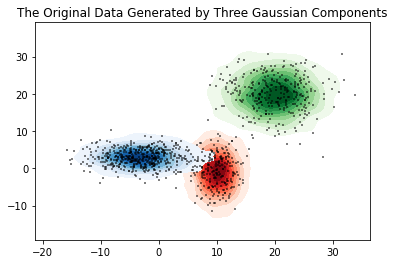

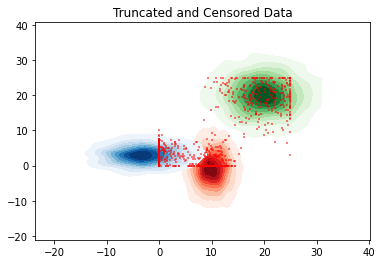

In [15]:
print("Estimated parameters by standard EM:")
print("pp: \n{}\n".format(tc_em_results['pp']))
print("mu: \n{}\n".format(tc_em_results['mu']))
print("sigma: \n{}\n".format(tc_em_results['sigma'].T))

In [14]:
tc_em_results

In [5]:
# Define the truncation and censoring bounds
truncation_bounds = np.array([0.1, np.inf])
censoring_bounds = np.array([[0], [25]])

N = 10000
pi = np.array([1,2,1])
if False:
    mu_1 = np.array([-3., 3.])
    mu_2 = np.array([10., -1.])
    mu_3 = np.array([20., 20.])
    mu = np.stack([mu_1, mu_2, mu_3], axis=0)

    sigma_1 = np.diag([20., 5.])
    sigma_2 = np.diag([5., 20.])
    sigma_3 = np.diag([20., 20.])
    sigma = np.stack([sigma_1, sigma_2, sigma_3], axis=2)
else:
    mu = np.array([-1, 0.8, 1.3])
    sigma = np.array([0.1, 0.1, 0.1])

X = gmm_dataset.generate_gmm_data_1D(pi, mu, sigma, N)

# Start the experiment 
#perform_univariate_3_gaussians_exp(N, pp, mu_1, mu_2, mu_3,
#                                  sigma_1, sigma_2, sigma_3,
#                                  truncation_bounds, censoring_bounds)

[1 2 0 ..., 1 0 1]


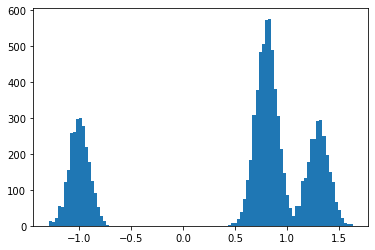

In [7]:
plt.hist(X, bins=100)
plt.show()

## GMM initialization 
We use K-means to initialize GMM parameters search. There probably be other options. 

In [ ]:
def find_censoring_pattern_1D(x, bounds):
    """Find the censoring pattern from the truncated and censored data.
    
    Args:
        x (1D numpy array): The data points.
        bounds (1D numpy array): The lower and upper censoring bounds.
        
    Returns:
        pattern (dictionary): The desired pattern.
    """
    # Get the number of data points and the number of dimensions
    # of each data point
    N = x.shape[0]
    D = 1
    
    # Get the lower and upper censoring bounds
    #if bounds.shape[0] == 1:
    #    bounds = bounds.T
    #if bounds.shape[1] < D:
    #    bounds = bounds * np.ones([1, D])
    lower_bounds, upper_bounds = bounds
    #upper_bounds = bounds[1, :]

    # Find the censored coordiantes
    censored = (x > lower_bounds) & (x < upper_bounds)

    # Find the datapoints that are completely observed
    complete_instances = censored#[:, 0] & censored[:, 1]

    # Estimate the integral region for each datapoint
    # Eq. 15 & 16 of Lee & Scott 2012
    integral_regions = []
    for n in range(N):
        # Get the uncensored locations
        uncens_loc = ~censored[n]
        
        # Check if the datpoint is fully observed
        if uncens_loc:
            reg_lower_bound = upper_bounds[uncens_loc]
            reg_upper_bound = lower_bounds[uncens_loc]
            
            reg_lower_bound[x[n, uncens_loc] == lower_bounds[uncens_loc]] =\
                np.array(-np.inf)
            reg_upper_bound[x[n, uncens_loc] == upper_bounds[uncens_loc]] =\
                np.array(np.inf)
            
            integral_regions.append([reg_lower_bound, reg_upper_bound])
        else:
            integral_regions.append([[], []])
            
    # Re-order the censoring pattern
    unique_pattern = np.unique(censored, axis=0)
    same_pattern = np.zeros([N, unique_pattern.shape[0]], dtype=np.bool)

    for k in range(unique_pattern.shape[0]):
        same_pattern[:, k] = (censored == unique_pattern[k, :]).all(axis=1)

    num_patterns = sum(same_pattern)

    idx = num_patterns.argsort()[::-1]
    num_patterns = num_patterns[idx]

    unique_pattern = unique_pattern[idx, :]
    same_pattern = same_pattern[:, idx]

    # Return the dictionary containing the censoring patterns
    pattern = {
        'censored': censored,
        'complete': complete_instances,
        'range' : integral_regions,
        'uniq_censored': unique_pattern,
        'count': num_patterns,
        'xpttn': same_pattern
    }

    return pattern


def perform_truncated_em_1D(x, K, truncated_bounds, censoring_bounds, 
                         pp, mu, sigma, max_iteration=200):
    """Estimate GMM's parameters by using EM algorithm for truncated and
       censored data.
    
    Args:
        x (1D numpy array): The observed data.
        K (int): The number of mixture component.
        truncated_bounds (1D numpy array): The truncated bounds.
        censoring_bounds (1D numpy array): The censoring bounds. 
        pp (1D numpy array): The initialized component probabilities.
        mu (1D numpy array): The initialized means.
        sigma (1D numpy array): The initialized covariance.
        max_iteration (int): The maximum number of iterations.
        
    Returns:
        results (dictionary): The dictionary containing estimated parameters
            and the logs of the experiment.
    """
    # Get the shapes of the data
    N, D = x.shape
    K = mu.shape[0]

    # Find censoring patterns of the data
    pattern = find_censoring_pattern_1D(x, censoring_bounds)

    # Initialize the array used to track the log likelihood
    ll_old = -np.inf
    ll_hist = np.zeros([max_iteration])

    for it in range(max_iteration):
        # E-STEP

        # Compute the posterior z|x and its log-likelihood
        post, ll = estimate_truncated_censored_loglikelihood(
            x, pp, mu, sigma, pattern, truncated_bounds)

        # Store to the list of history and check convergence
        lldiff = ll - ll_old
        ll_hist[it] = ll
        if (lldiff >= 0) and (lldiff < 10e-7):
            break
        ll_old = ll

        # Compute the unnormalzied truncated component probability
        sum_post = np.sum(post, axis=0)

        # M-STEP
        
        # Consider each component independently
        for k in range(K):
            # 0. Compute the sufficient statistics
            x_hat_e, Q_e, alpha = estimate_sufficient_statistics(
                x, mu[k, :], sigma[:, :, k], pattern)

            # Avoid numerical issue regarding alpha
            alpha0 = (alpha == 0)
            x_hat = x_hat_e
            x_hat[alpha0, :] = 0
            Q = Q_e
            Q[:, :, alpha0] = 0

            # 1. Update mean
            # Estimate the correction term (mk) of the mean
            tc_pdf = norm.pdf(truncated_bounds[0], mu[k, 0],
                              np.sqrt(float(sigma[0, 0, k])))
            mk = tc_pdf / (1 - tc_pdf)

            mu[k, :] = (post[:,k].T.dot(x_hat)) /\
                sum_post[k] - sigma[0, :, k].dot(mk)

            # 2. Update covariance
            # Estimate the correction term (Rk) of the covariance
            Rk = (truncated_bounds[0] - mu[k, 0]) *\
                norm.pdf(truncated_bounds[0], mu[k, 0],\
                np.sqrt(float(sigma[0, 0, k]))) /\
                sigma[0, 0, k] / (1 - norm.cdf(truncated_bounds[0], mu[k, 0],\
                np.sqrt(float(sigma[0, 0, k]))))

            x_hat_0 = (x_hat - mu[k, :]) * np.sqrt(post[:, k].reshape([-1, 1]))

            sigma_new = x_hat_0.T.dot(x_hat_0) + \
                Q.reshape([D*D, N]).dot(post[:, k]).reshape([D, D])
            sigma_new = sigma_new / sum_post[k] - \
                sigma[0, :, k].reshape([1, 2]).T.dot(sigma[0, :, k].\
                reshape([1, 2])).dot(Rk)

            sigma[:, :, k] = (sigma_new + sigma_new.T) / 2

        # Estimate the component probabilities
        sum_post_ratio = np.zeros([K])
        for k in range(K):
            sum_post_ratio[k] = 1 - norm.cdf(truncated_bounds[0],
                                             mu[k, 0], 
                                             np.sqrt(float(sigma[0, 0, k])))
        pp = sum_post / sum_post_ratio
        pp = pp / np.sum(pp)
        
        if it % 10 == 0:
            print("\tIteration #{} \t ** Log-likelihood: {}".format(it, ll))

    # Return the results
    results = {
        'K': K,
        'pp': pp,
        'mu': mu,
        'sigma': sigma,
        'iters': it+1,
        'log_lh': ll,
        'll_hist': ll_hist[:it+1]
    }
    
    return results


In [ ]:
def perform_univariate_3_gaussians_exp(N, pp, mu_1, mu_2, mu_3,
                                      sigma_1, sigma_2, sigma_3, 
                                      truncation_bounds, censoring_bounds,
                                      max_iteration=50, seed=100):
    """Perform experiment on bivariate dataset generated from 3 Gaussians.

    Args:
        N (int): 
        pp (1D numpy array): The mixing weights.
        mu_1 float: The mean corresponding of the Gaussian 1.
        mu_2 float: The mean corresponding of the Gaussian 2.
        mu_3 float: The mean corresponding of the Gaussian 3.
        sigma_1 float: variance of the Gaussian 1.
        sigma_2 float: variance of the Gaussian 2.
        sigma_3 float: variance of the Gaussian 3.
        truncation_bounds (1D numpy array): The truncation bounds applied on the
            dataset.
        censoring_bounds (1D numpy array): The censoring bounds applied on theM
            dataset.
        max_iteration (int): The maximum number of iterations.
        seed (int): The random seed for reproducibility.
    """

Step #1: Generating a Gaussian-Mixture-Model dataset
True parameters:
pp: 
[1 1 2]

mu: 
[-1.   0.8  1.3]

sigma: 
[ 0.1  0.1  0.1]

[2 0 2 ..., 2 1 2]

********************************************************************************
Step #2: Censoring and truncating the data

********************************************************************************
Step #3: Initializing parameters using K-means

********************************************************************************
Step #4: Estimating parameters using truncated and censored EM


NameError: name 'perform_truncated_em_1D' is not defined

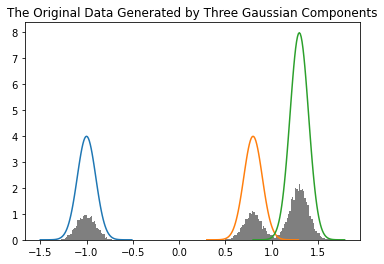

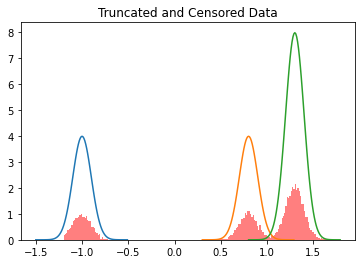

In [2]:
    pp = np.array([1,1,2])
    mu = np.array([-1, 0.8, 1.3])
    sigma = np.array([0.1, 0.1, 0.1])
    N = 10000
    max_iteration=5
    seed = 1000

    # Fix the random state
    random.seed(seed)
    np.random.seed(seed)

    # Stack and reorder the means and covariance matrices into unified matrices
    pp, mu, sigma = gmm_dataset.reorder_gmm_compoments_1D(pp, mu, sigma)
    K = mu.shape[0]

    # Generate GMM data
    print("Step #1: Generating a Gaussian-Mixture-Model dataset")
    print("True parameters:")
    print("pp: \n{}\n".format(pp))
    print("mu: \n{}\n".format(mu))
    print("sigma: \n{}\n".format(sigma.T))
    y = gmm_dataset.generate_gmm_data_1D(pp, mu, sigma, N)

    # Plot the GMM data
    plt.figure()
    ax = vis.plot_gmm_data_1D(y, mu, sigma, pp, point_color='black')
    plt.title("The Original Data Generated by Three Gaussian Components")
    print("\n" + "*"*80)

    # Perform censoring and truncation on the original data
    print("Step #2: Censoring and truncating the data")
    x = cutils.censor_and_truncate_data_1D(y, c_up=1.8, c_low=-2, t_up=np.inf, t_low=-1.2)

    # Plot the censored and truncated data
    plt.figure()
    ax = vis.plot_gmm_data_1D(x, mu, sigma, pp, point_color='red')
    plt.title("Truncated and Censored Data")
    print("\n" + "*"*80)

    # Init parameters using K-means
    # Other methods than K-means maybe used. 
    # In speech recognition applications, for example, Grow Mixture models are frequently employed.
    print("Step #3: Initializing parameters using K-means")
    par = param_init.init_kmeans_1D(x, K)
    print("\n" + "*"*80)

    ## --------- test data ready -----------
    
    # Estimating parameters using truncated and censored EM
    print("Step #4: Estimating parameters using truncated and censored EM")
    tc_em_results = perform_truncated_em_1D(x, K, 
                                         truncation_bounds, censoring_bounds, 
                                         par['pp'], par['mu'], par['sigma'], 
                                         max_iteration)

    print("Estimated parameters by standard EM:")
    print("pp: \n{}\n".format(tc_em_results['pp']))
    print("mu: \n{}\n".format(tc_em_results['mu']))
    print("sigma: \n{}\n".format(tc_em_results['sigma'].T))
    
    plt.figure()
    plt.plot(range(len(tc_em_results['ll_hist'])), tc_em_results['ll_hist'])
    plt.title("Learning Curve of the Truncated and Censored EM")
    plt.xlabel("Iteration")
    plt.ylabel("Log-likelihood")

    plt.figure()
    ax = vis.plot_gmm_data_1D(x, tc_em_results['mu'], tc_em_results['sigma'], tc_em_results['pp'])
    plt.title("Truncated and Censored EM")
    print("\n" + "*"*80)

    print("Step #5: Estimating parameters using standard EM")
    std_em_results = standard_em.perform_standard_em_1D(x, K, seed)

    print("Estimated parameters by standard EM:")
    print("pp: \n{}\n".format(std_em_results['pp']))
    print("mu: \n{}\n".format(std_em_results['mu']))
    print("sigma: \n{}\n".format(std_em_results['sigma'].T))

    plt.figure()
    ax = plot_gmm_data_1D(x, std_em_results['mu'], std_em_results['sigma'], std_em_results['pp'])
    plt.title("Standard EM")
    print("\n" + "*"*80)

    # Evaluate the KL-Divergence between true distribution and estimated 
    # distributions
    print("Step #6: Evaluating the estimated parameters")
    pp, mu, sigma = reorder_gmm_compoments(pp, mu, sigma)
    tc_em_results['pp'], tc_em_results['mu'], tc_em_results['sigma'] =\
        reorder_gmm_compoments(tc_em_results['pp'], tc_em_results['mu'],
                               tc_em_results['sigma'])
    std_em_results['pp'], std_em_results['mu'], std_em_results['sigma'] =\
        reorder_gmm_compoments(std_em_results['pp'], std_em_results['mu'],
                               std_em_results['sigma'])
                               
    true_gmm = build_GMM_model(pp, mu, sigma, seed)
    tc_gmm = build_GMM_model(tc_em_results['pp'], tc_em_results['mu'],
                             tc_em_results['sigma'], seed)
    std_gmm = build_GMM_model(std_em_results['pp'], std_em_results['mu'],
                              std_em_results['sigma'], seed)
                              
    tc_kl = estimate_kl_divergence_gmm(true_gmm, tc_gmm)
    std_kl = estimate_kl_divergence_gmm(true_gmm, std_gmm)    

    print("\t* KL-Divergence corresponding to truncated and censored EM: {}".\
        format(tc_kl))
    print("\t* KL-Divergence corresponding to standard EM: {}".\
        format(std_kl))
    print("\n" + "*"*80)

    # Show the plots
    print("Step #7: Showing the plots")
    plt.show()

In [12]:
seed = 123
N = 100000

# Define the true values of mixture weights
pp = np.array([0.5, 0.2, 0.3])

# Define Gaussian components
mu_1 = np.array([-3., 3.])
mu_2 = np.array([10., -1.])
mu_3 = np.array([20., 20.])
sigma_1 = np.diag([20., 5.])
sigma_2 = np.diag([5., 20.])
sigma_3 = np.diag([20., 20.])

# Define the truncation and censoring bounds
truncation_bounds = np.array([0, np.inf])
censoring_bounds = np.array([[0], [25]])

In [10]:
# Fix the random state
random.seed(seed)
np.random.seed(seed)

# Stack and reorder the means and covariance matrices into unified matrices
mu = np.stack([mu_1, mu_2, mu_3], axis=0)
sigma = np.stack([sigma_1, sigma_2, sigma_3], axis=2)
pp, mu, sigma = reorder_gmm_compoments(pp, mu, sigma)
K = mu.shape[0]

# Generate GMM data
print("Step #1: Generating a Gaussian-Mixture-Model dataset")
print("True parameters:")
print("pp: \n{}\n".format(pp))
print("mu: \n{}\n".format(mu))
print("sigma: \n{}\n".format(sigma.T))
y = generate_gmm_data(pp, mu, sigma, N)

# Plot the GMM data
plt.figure()
ax = plot_gmm_data(y, mu, sigma, point_color='black')
plt.title("The Original Data Generated by Three Gaussian Components")
print("\n" + "*"*80)

# Perform censoring and truncation on the original data
print("Step #2: Censoring and truncating the data")
x = censor_and_truncate_data(y)

# Plot the censored and truncated data
plt.figure()
ax = plot_gmm_data(y, mu, sigma, point_color='red')
plt.title("Truncated and Censored Data")
print("\n" + "*"*80)

# Init parameters using K-means
print("Step #3: Initializing parameters using K-means")
par = init_kmeans(x, K)
print("\n" + "*"*80)

NameError: name 'random' is not defined

In [ ]:
tc_em_results = perform_truncated_em(x, K, 
                                     truncation_bounds, censoring_bounds, 
                                     par['pp'], par['mu'], par['sigma'], 
                                     max_iteration)

print("Estimated parameters by standard EM:")
print("pp: \n{}\n".format(tc_em_results['pp']))
print("mu: \n{}\n".format(tc_em_results['mu']))
print("sigma: \n{}\n".format(tc_em_results['sigma'].T))

plt.figure()
plt.plot(range(len(tc_em_results['ll_hist'])), tc_em_results['ll_hist'])
plt.title("Learning Curve of the Truncated and Censored EM")
plt.xlabel("Iteration")
plt.ylabel("Log-likelihood")

plt.figure()
ax = plot_gmm_data(x, tc_em_results['mu'], tc_em_results['sigma'])
plt.title("Truncated and Censored EM")
print("\n" + "*"*80)

print("Step #5: Estimating parameters using standard EM")
std_em_results = perform_standard_em(x, K, seed)

print("Estimated parameters by standard EM:")
print("pp: \n{}\n".format(std_em_results['pp']))
print("mu: \n{}\n".format(std_em_results['mu']))
print("sigma: \n{}\n".format(std_em_results['sigma'].T))

plt.figure()
ax = plot_gmm_data(x, std_em_results['mu'], std_em_results['sigma'])
plt.title("Standard EM")
print("\n" + "*"*80)

# Evaluate the KL-Divergence between true distribution and estimated 
# distributions
print("Step #6: Evaluating the estimated parameters")
pp, mu, sigma = reorder_gmm_compoments(pp, mu, sigma)
tc_em_results['pp'], tc_em_results['mu'], tc_em_results['sigma'] =\
    reorder_gmm_compoments(tc_em_results['pp'], tc_em_results['mu'],
                           tc_em_results['sigma'])
std_em_results['pp'], std_em_results['mu'], std_em_results['sigma'] =\
    reorder_gmm_compoments(std_em_results['pp'], std_em_results['mu'],
                           std_em_results['sigma'])

true_gmm = build_GMM_model(pp, mu, sigma, seed)
tc_gmm = build_GMM_model(tc_em_results['pp'], tc_em_results['mu'],
                         tc_em_results['sigma'], seed)
std_gmm = build_GMM_model(std_em_results['pp'], std_em_results['mu'],
                          std_em_results['sigma'], seed)

tc_kl = estimate_kl_divergence_gmm(true_gmm, tc_gmm)
std_kl = estimate_kl_divergence_gmm(true_gmm, std_gmm)    

print("\t* KL-Divergence corresponding to truncated and censored EM: {}".\
    format(tc_kl))
print("\t* KL-Divergence corresponding to standard EM: {}".\
    format(std_kl))
print("\n" + "*"*80)

# Show the plots
print("Step #7: Showing the plots")
plt.show()
